In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report ,accuracy_score
from pandas.plotting import scatter_matrix



In [7]:
#LOADING THE DATASET
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names =['id','clump_thickness','uniform_cell_size','uniform_cell_shape',
       'marginal_adhesion','single_epethilial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df=pd.read_csv(url,names=names)


URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [ ]:
#preproccesisng the data

df.replace('?',-99999,inplace=True)
print (df.axes)

df.drop(['id'],1,inplace=True)
print(df.shape)


In [13]:
#do dataset visulisation
print(df.loc[0])
print(df.describe())


clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epethilial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epethilial_size  bland_chromatin  \
count         699.000000              699.

In [2]:
#plot histograms for these datasets

df.hist(figsize=(10,10))
plt.show()


NameError: name 'df' is not defined

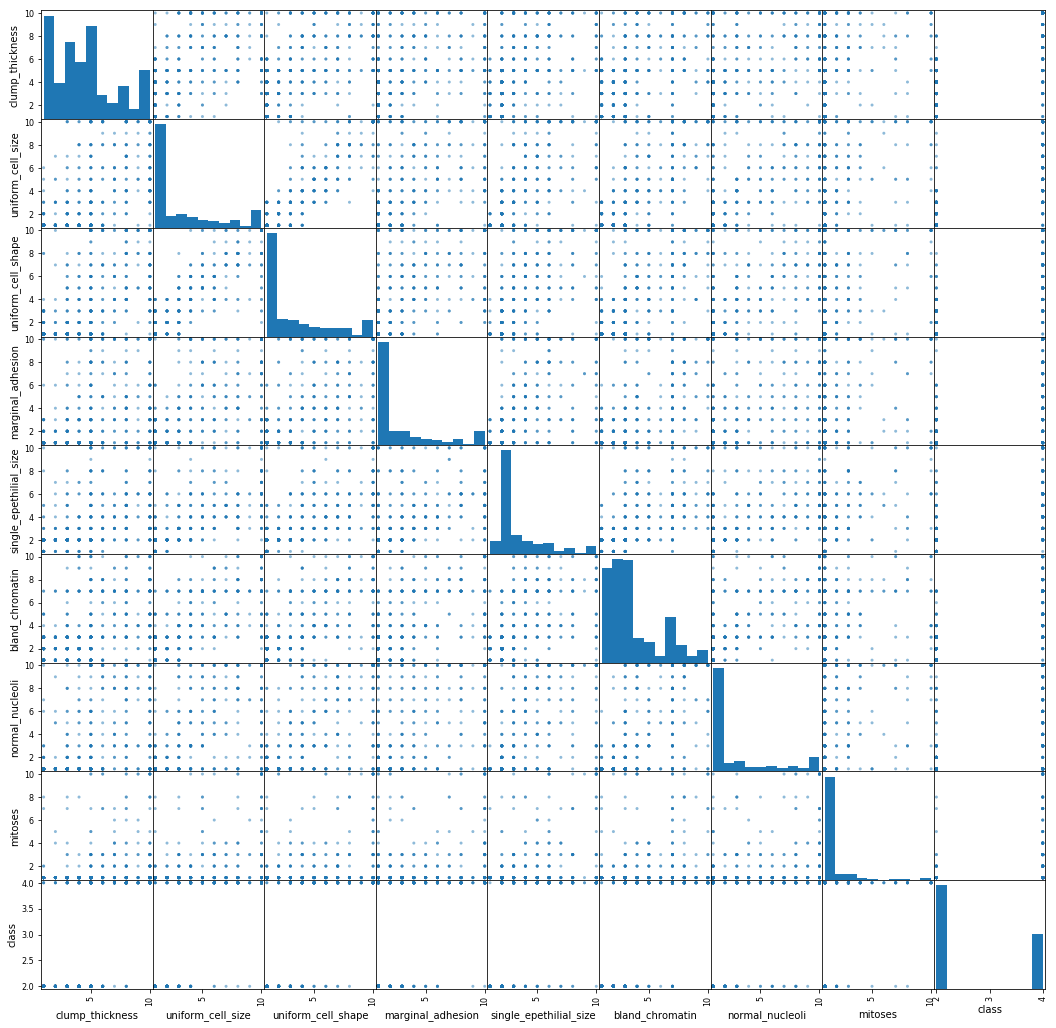

In [16]:
#CREATE A SCATTER PLOT MATRIX

scatter_matrix(df,figsize=(18,18))
plt.show()


In [43]:
#splitting the datasets
X=np.array(df.drop(['class'],1))
y=np.array(df['class'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)


In [44]:
#specify testing options

seed=7
scoring='accuracy'


In [45]:
#define models to train

models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=6)))
models.append(('SVM',SVC()))

results=[]
names=[]

for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=k_fold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
    
    
    

KNN: 0.963138 (0.031453)
SVM: 0.950808 (0.028095)


In [48]:
#make predictions

for name,model in models:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)

    print (name)
    print (accuracy_score(y_test,predictions))
    print (classification_report(y_test,predictions))
    


KNN
0.9714285714285714
             precision    recall  f1-score   support

          2       0.97      0.98      0.98       132
          4       0.97      0.95      0.96        78

avg / total       0.97      0.97      0.97       210

SVM
0.9523809523809523
             precision    recall  f1-score   support

          2       0.99      0.93      0.96       132
          4       0.90      0.99      0.94        78

avg / total       0.96      0.95      0.95       210

